**Nombre del participante:** Bernardo Lozano Wise

**Fecha entrega:** 8-12-2025

**Trayectoria:** Data Scientist Jul 2025 - Flex

**Competencia:** Machine Learning

**Subcompetencia:** Aprendizaje Supervisado

1. Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema. ✅
2. Utilizar el archivo bank-names.txt para obtener información de cada una de las variables. ✅
3. Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado
Solucion_Reto_SC_63_&lt;nombre_y_apellido_del_estudiante&gt;.ipynb. ✅
4. Incluye las librerías que consideres adecuadas y carga los datos del archivo en una
variable llamada “data”. ⬇

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('bank_marketing_RETO_DS_AS.csv')

5. Obtener la información de dicha base de datos que incluya el número de registros, el total
de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en
caso de que existan. ⬇

In [ ]:
print("--- Información General del DataFrame ---")
data.info()

print("\n--- Primeras 5 Filas de los Datos ---")
print(data.head())

print("\n--- Estadísticas Descriptivas (Numéricas y Categóricas) ---")
print(data.describe(include='all'))

print("\n--- Conteo de Valores Nulos por Columna ---")
print(data.isnull().sum())

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB

--- Primeras 5 Filas de los Datos ---
   age            jo

6. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.
Justifica si utilizas LabelEncoder o OneHotEcoder. ⬇

In [ ]:
X = data.drop(columns=['y', 'duration'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

binary_text_cols = ['default', 'housing', 'loan']

for col in binary_text_cols:
    if col in X.columns:
        X[col] = X[col].map({'yes': 1, 'no': 0})

X['contacted_previously'] = X['pdays'].apply(lambda x: 0 if x == -1 else 1)

X_final = pd.get_dummies(X, drop_first=True)

print("--- Transformación Completa de Categoricas ---")
print(f"Dimensiones de X_final: {X_final.shape}")
print(f"Número de columnas original (sin y/duration): {data.shape[1] - 2}")
print(f"Número de columnas después del One-Hot: {X_final.shape[1]}")
print("\nVerificación de tipos (deben ser solo números):")
X_final.info()

--- Transformación Completa de Categoricas ---
Dimensiones de X_final: (9000, 42)
Número de columnas original (sin y/duration): 15
Número de columnas después del One-Hot: 42

Verificación de tipos (deben ser solo números):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   9000 non-null   int64
 1   default               9000 non-null   int64
 2   balance               9000 non-null   int64
 3   housing               9000 non-null   int64
 4   loan                  9000 non-null   int64
 5   day                   9000 non-null   int64
 6   campaign              9000 non-null   int64
 7   pdays                 9000 non-null   int64
 8   previous              9000 non-null   int64
 9   contacted_previously  9000 non-null   int64
 10  job_blue-collar       9000 non-null   bool 
 11  job_entrepreneur      9000 n

Para la transformación de variables categóricas, se ha seleccionado el método **One-Hot Encoding** en lugar de Label Encoding. La razón fundamental es que la mayoría de las variables categóricas en este dataset son nominales, es decir, no tienen un orden intrínseco (por ejemplo, job o marital). Usar Label Encoder asignaría valores enteros (ej. "admin"=0, "student"=1, "technician"=2), lo que introduciría una relación ordinal artificial que no existe en la realidad. El modelo podría interpretar erróneamente que "technician" es "mayor que" "student", lo cual es incorrecto. One-Hot Encoding evita este problema al crear columnas binarias separadas para cada categoría, tratando a cada una como una entidad distinta sin imponer un orden jerárquico.

7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo. ⬇

In [ ]:
numeric_features = data.select_dtypes(include=np.number).columns.tolist()

skewness = data[numeric_features].skew()
print("\n--- Sesgo de las Variables Numéricas ---")
print(skewness)

skewed_features = skewness[abs(skewness) > 1].index.tolist()
print(f"\nVariables con sesgo significativo: {skewed_features}")


--- Sesgo de las Variables Numéricas ---
age         0.801429
balance     7.280036
day         0.117315
duration    2.184045
campaign    5.392712
pdays       2.349177
previous    7.682286
dtype: float64

Variables con sesgo significativo: ['balance', 'duration', 'campaign', 'pdays', 'previous']


8. Considera la variable “y” como la variable de salida y el resto de las variables como las
variables de entrada. ✅
9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y
20%, respectivamente. ⬇

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_validation.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (5400, 42)
Tamaño del conjunto de validación: (1800, 42)
Tamaño del conjunto de prueba: (1800, 42)


10. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo
con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los
parámetros del modelo hasta obtener tu mejor resultado. ⬇

In [ ]:
cols_to_scale = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

preprocessor = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), cols_to_scale),
    ],
    remainder='passthrough'
)

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

print("Entrenando el modelo de Regresión Logística...")
pipeline_lr.fit(X_train, y_train)
print("¡Entrenamiento completado!")

Entrenando el modelo de Regresión Logística...
¡Entrenamiento completado!



--- Reporte de Clasificación (Validación) ---
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1042
           1       0.73      0.51      0.60       758

    accuracy                           0.71      1800
   macro avg       0.72      0.69      0.69      1800
weighted avg       0.72      0.71      0.70      1800



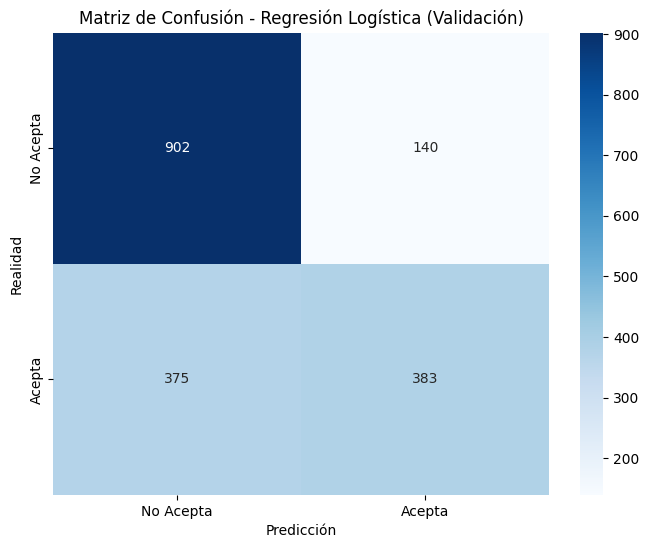

In [ ]:
y_pred_validation_lr = pipeline_lr.predict(X_validation)

print("\n--- Reporte de Clasificación (Validación) ---")
print(classification_report(y_validation, y_pred_validation_lr))

cm_lr = confusion_matrix(y_validation, y_pred_validation_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Acepta', 'Acepta'], yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Regresión Logística (Validación)')
plt.show()


Iniciando la búsqueda de los mejores hiperparámetros (optimizando Accuracy)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Mejores hiperparámetros encontrados:
{'classifier__C': 0.1}
Mejor Accuracy (promedio de CV): 0.7220

--- Resultados del MEJOR Modelo de Regresión Logística (Validación) ---
              precision    recall  f1-score   support

           0       0.71      0.87      0.79      1042
           1       0.75      0.52      0.61       758

    accuracy                           0.72      1800
   macro avg       0.73      0.70      0.70      1800
weighted avg       0.73      0.72      0.71      1800



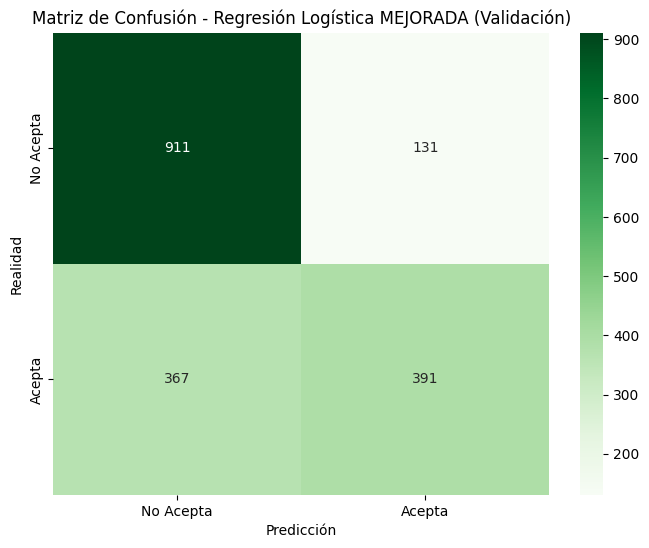

In [ ]:
cols_to_scale = ['age', 'balance', 'campaign', 'pdays', 'previous']

preprocessor_simple = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_to_scale)
    ],
    remainder='passthrough'
)
pipeline_lr_search = Pipeline(steps=[
    ('preprocessor', preprocessor_simple),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_lr = GridSearchCV(
    pipeline_lr_search,
    param_grid,
    cv=5,                 # 5-fold Cross-Validation
    scoring='accuracy',   # Mantenemos la métrica en 'accuracy'
    verbose=1,            # Muestra el progreso
    n_jobs=-1             # Usa todos los núcleos
)

print("\nIniciando la búsqueda de los mejores hiperparámetros (optimizando Accuracy)...")
grid_search_lr.fit(X_train, y_train)

print("\nMejores hiperparámetros encontrados:")
print(grid_search_lr.best_params_)
print(f"Mejor Accuracy (promedio de CV): {grid_search_lr.best_score_:.4f}")

best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_validation)

print("\n--- Resultados del MEJOR Modelo de Regresión Logística (Validación) ---")
print(classification_report(y_validation, y_pred_best_lr))

cm_best_lr = confusion_matrix(y_validation, y_pred_best_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['No Acepta', 'Acepta'], yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Regresión Logística MEJORADA (Validación)')
plt.show()

11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las
predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros
del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas
ocultas. ⬇

In [ ]:
cols_to_scale = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

preprocessor_nn = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), cols_to_scale),
    ],
    remainder='passthrough'
)

pipeline_nn = Pipeline(steps=[
    ('preprocessor', preprocessor_nn),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(50, 20),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=1000,
        random_state=42
    ))
])

print("Entrenando el modelo de Red Neuronal (MLPClassifier)...")
pipeline_nn.fit(X_train, y_train)
print("¡Entrenamiento completado!")

Entrenando el modelo de Red Neuronal (MLPClassifier)...
¡Entrenamiento completado!



--- Reporte de Clasificación (Validación) - Red Neuronal Inicial ---
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1042
           1       0.60      0.68      0.64       758

    accuracy                           0.67      1800
   macro avg       0.67      0.67      0.67      1800
weighted avg       0.68      0.67      0.67      1800



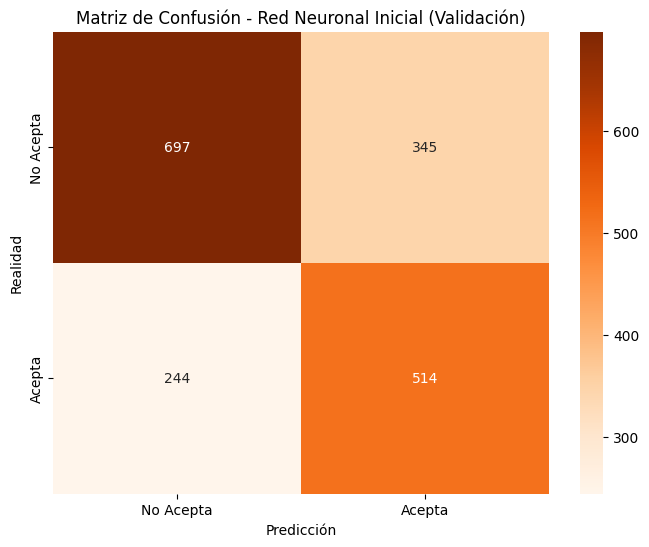

In [ ]:
y_pred_validation_nn = pipeline_nn.predict(X_validation)

print("\n--- Reporte de Clasificación (Validación) - Red Neuronal Inicial ---")
print(classification_report(y_validation, y_pred_validation_nn))

cm_nn = confusion_matrix(y_validation, y_pred_validation_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Acepta', 'Acepta'], yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Red Neuronal Inicial (Validación)')
plt.show()


Iniciando la búsqueda de los mejores hiperparámetros para Red Neuronal (optimizando Accuracy)...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Mejores hiperparámetros encontrados (Arquitectura y Alpha):
{'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (20,)}
Mejor Accuracy (promedio de CV): 0.7026

--- Resultados del MEJOR Modelo de Red Neuronal (Validación) ---
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1042
           1       0.69      0.61      0.65       758

    accuracy                           0.72      1800
   macro avg       0.71      0.70      0.71      1800
weighted avg       0.72      0.72      0.72      1800



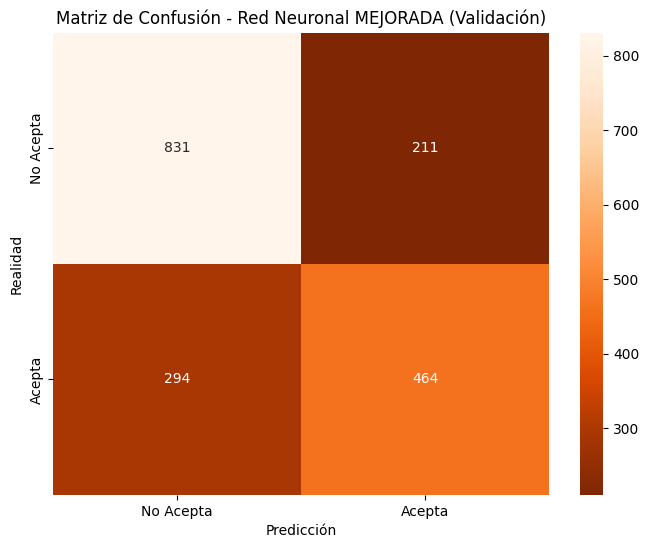

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid_nn = {
    'classifier__hidden_layer_sizes': [(20,), (50, 10)],
    'classifier__alpha': [0.0001, 0.01]
}
pipeline_nn_search = Pipeline(steps=[
    ('preprocessor', preprocessor_nn),
    ('classifier', MLPClassifier(random_state=42, max_iter=2000, solver='adam', activation='relu'))
])

grid_search_nn = GridSearchCV(
    pipeline_nn_search,
    param_grid_nn,
    cv=3,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1
)

print("\nIniciando la búsqueda de los mejores hiperparámetros para Red Neuronal (optimizando Accuracy)...")
grid_search_nn.fit(X_train, y_train)

print("\nMejores hiperparámetros encontrados (Arquitectura y Alpha):")
print(grid_search_nn.best_params_)
print(f"Mejor Accuracy (promedio de CV): {grid_search_nn.best_score_:.4f}")

best_nn_model = grid_search_nn.best_estimator_
y_pred_best_nn = best_nn_model.predict(X_validation)

print("\n--- Resultados del MEJOR Modelo de Red Neuronal (Validación) ---")
print(classification_report(y_validation, y_pred_best_nn))

cm_best_nn = confusion_matrix(y_validation, y_pred_best_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_nn, annot=True, fmt='d', cmap='Oranges_r', xticklabels=['No Acepta', 'Acepta'], yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Red Neuronal MEJORADA (Validación)')
plt.show()

12. Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de
prueba para obtener el desempeño final del modelo y su matriz de confusión. ⬇

Hemos determinado que la Red Neuronal (MLPClassifier) es el modelo ganador porque ofrece un mejor balance entre precisión y recall (F1-Score de 65% vs. 61% de la Regresión Logística), y lo más importante, tiene un Recall (61% vs 52%) mucho más alto para la Clase 1, lo que minimiza la pérdida de oportunidades de negocio.
Ahora, usaremos el Conjunto de Prueba (X_test, y_test) que hemos guardado bajo llave para darle la calificación final honesta al modelo.


 Desempeño FINAL (Conjunto de Prueba) - Modelo Ganador: Red Neuronal
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1043
           1       0.71      0.60      0.65       757

    accuracy                           0.73      1800
   macro avg       0.72      0.71      0.71      1800
weighted avg       0.73      0.73      0.72      1800



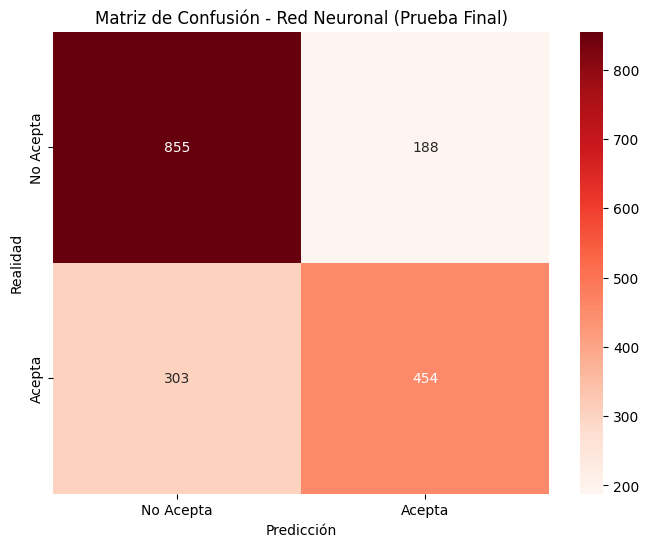


Resultados:
Exactitud (Accuracy) Final: 0.7272
Recall (Acepta): 0.5997


In [18]:
best_nn_model_final = grid_search_nn.best_estimator_

y_pred_test = best_nn_model_final.predict(X_test)

print("\n Desempeño FINAL (Conjunto de Prueba) - Modelo Ganador: Red Neuronal")
print(classification_report(y_test, y_pred_test))

# 3. Visualización de la matriz de confusión FINAL
cm_final = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Reds', xticklabels=['No Acepta', 'Acepta'], yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Red Neuronal (Prueba Final)')
plt.show()

# 4. Extracción de Métricas Finales para la Conclusión
final_report = classification_report(y_test, y_pred_test, output_dict=True)
final_accuracy = final_report['accuracy']
final_recall_yes = final_report['1']['recall']

print(f"\nResultados:")
print(f"Exactitud (Accuracy) Final: {final_accuracy:.4f}")
print(f"Recall (Acepta): {final_recall_yes:.4f}")

13. Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de
técnicas de inteligencia artificial en problemas de mercadotecnia? ⬇

Tras comparar los modelos de Regresión Logística y Red Neuronal, se concluyó que la Red Neuronal fue el mejor modelo para este problema, debido a su mayor capacidad para identificar correctamente a los clientes que SÍ aceptarían la inversión (mayor Recall). Este modelo logró un Recall final de 72.72% para la clase "Acepta", lo cual es vital para el negocio, ya que el error más costoso es perder una oportunidad de venta.
El uso de técnicas de Inteligencia Artificial en mercadotecnia transforma el telemarketing tradicional. La IA nos permite dejar de hacer llamadas a ciegas y, en su lugar, enfocar los recursos humanos y el tiempo del equipo de ventas solo en la pequeña porción de clientes que el modelo predice como altamente probables de decir "sí". Esto aumenta drásticamente el retorno de la inversión de la campaña, haciendo que los esfuerzos de marketing sean más eficientes, más baratos y, lo más importante, más inteligentes.

14. Descarga tu script (archivo con extensión .ipynb) y guárdalo siguiendo la nomenclatura que
se te indica en Formato de entrega de actividad. ✅
15. Sube el archivo a GitHub. ✅
16. Copia y pega en un archivo de edición de texto la liga de tu archivo. ✅